# **A Network Science Approach to Princeton Course Curriculum**
###**Authors:** Ishan Saha, Stephen Zheng, Krishna Parikh
#1. Importing Data
From scraping the data of classes and their prerequisites and corequisites as edges in a graph, we can study these course networks from the perspective of centrality. First, we add the data for classes from the COS, MAE, ORF, CEE departments.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the class codes and their corresponding prerequisites

cosClasses  = [
    ("MAT201", "MAT104"),
    ("MAT203", "MAT104"),
    ("MAT202", "MAT104"),
    ("MAT204", "MAT104"),
    ("PHY104", "PHY103"),
    ("PHY106", "PHY105"),
    ("ISC232", "ISC231"),
    ("ISC231", "MAT104"),
    ("COS109", "COS126"),
    ("COS217", "COS126"),
    ("ISC232", "ISC231"),
    ("COS226", "COS126"),
    ("COS240", "COS126"),
    ("COS302", "COS126"),
    ("COS316", "COS217"),
    ("COS324", "MAT103"),
    ("COS324", "MAT202"),
    ("COS324", "COS226"),
    ("COS333", "COS217"),
    ("COS350", "COS324"),
    ("COS350", "COS343"),
    ("COS350", "COS424"),
    ("COS350", "COS302"),
    ("COS350", "ECE364"),
    ("COS350", "ECE435"),
    ("COS350", "MAT490"),
    ("COS350", "ORF350"),
    ("COS375", "COS217"),
    ("COS426", "COS217"),
    ("COS426", "COS226"),
    ("COS426", "MAT202"),
    ("COS436", "COS217"),
    ("COS448", "COS217"),
    ("COS448", "COS226"),
    ("COS448", "COS333"),
    ("COS487", "COS340"),
    ("COS516", "COS226"),
    ("COS516", "COS326"),
    ("COS521", "COS423"),
    ("COS521", "COS433"),
    ("COS521", "COS445"),
    ("COS521", "COS451"),
    ("COS521", "COS487"),
    ("COS533", "COS240"),
    ("COS533", "COS433"),
    ("COS597F", "COS484"),
    ("COS597F", "COS584"),
    ("COS597F", "COS429"),
    ("COS597F", "COS529"),
    ("COS597F", "COS485"),
    ("COS597G", "COS484"),
    ("ECE206", "COS306"),
    ("ECE396", "MAT202"),
    ("ECE396", "MAT204"),
    ("ECE434", "COS324"),
    ("ECE470", "COS226"),
    ("ECE539B", "COS597P"),
    ("ISC231", "MAT104"),
    ("ISC232", "MAT104"),
    ("MAE345", "MAT201"),
    ("MAE345", "MAT203"),
    ("MAE345", "MAT202"),
    ("MAE345", "MAT204"),
    ("MAE345", "COS126"),
    ("ORF363", "MAT201"),
    ("ORF363", "MAT203"),
    ("ORF363", "MAT202"),
    ("ORF363", "MAT204"),
    ("PSY360", "COS360"),
    ("QCB455", "COS126"),
    ("CEE520", "COS520"),
    ("COS320", "COS217"),
    ("COS320", "COS226"),
    ("COS320", "COS326"),
    ("COS418", "COS217"),
    ("COS423", "COS226"),
    ("COS423", "COS240"),
    ("COS429", "COS217"),
    ("COS429", "COS226"),
    ("COS429", "COS324"),
    ("COS432", "COS217"),
    ("COS432", "COS226"),
    ("COS445", "COS226"),
    ("COS445", "COS240"),
    ("COS471", "COS217"),
    ("COS471", "COS226"),
    ("COS484", "COS324"),
    ("COS495", "COS240"),
    ("COS510", "COS326"),
    ("COS513", "COS324"),
    ("ECE305", "COS333"),
    ("SML305", "COS302"),
    ("ORF309", "COS324"),
    ("MAE434", "COS326"),
    ("ECE201", "COS333"),
    ("MAE206", "COS333"),
    ("ECE368", "COS323"),
    ("ECE435", "COS324"),
    ("MAT490", "COS302"),
    ("ORF335", "COS471"),
    ("ORF350", "COS302"),
    ("ORF245", "COS473"),
    ("ECE375", "COS475"),
    ("ECE206", "COS475"),
    ("ORF309", "COS495"),
    ("MAE305", "COS495"),
    ("ECE462", "COS473"),
    ("ECE473", "COS473"),
    ("ORF245", "COS473"),
    ("COS455", "COS311"),
    ("COS401", "COS360"),
    ("LIN304", "COS401"),
    ("TRA200", "COS401"),
    ("COS303", "COS301"),
    ("SOC555", "COS598J"),
    ("TRA301", "COS401"),
    ("COS401", "COS360"),
    ("LIN304", "COS401"),
    ("TRA200", "COS401")
]


orfClasses = [
    ("MAT201", "MAT104"),
    ("MAT203", "MAT104"),
    ("MAT202", "MAT104"),
    ("MAT204", "MAT104"),
    ("MAT202", "MAT215"),
    ("MAT204", "MAT215"),
    ("PHY104", "PHY103"),
    ("PHY106", "PHY105"),
    ("ORF245", "MAT201"),
    ("EGR245", "MAT201"),
    ("ORF309", "MAT201"),
    ("EGR309", "MAT201"),
    ("MAT380", "MAT201"),
    ("ORF309", "MAT203"),
    ("EGR309", "MAT203"),
    ("MAT380", "MAT203"),
    ("ORF309", "MAT216"),
    ("EGR309", "MAT216"),
    ("MAT380", "MAT216"),
    ("ORF309", "MAT202"),
    ("EGR309", "MAT202"),
    ("MAT380", "MAT202"),
    ("ORF309", "MAT204"),
    ("EGR309", "MAT204"),
    ("MAT380", "MAT204"),
    ("ORF309", "MAT202"),
    ("EGR309", "MAT202"),
    ("MAT380", "MAT202"),
    ("ORF309", "MAT204"),
    ("EGR309", "MAT204"),
    ("MAT380", "MAT204"),
    ("ORF405", "ORF245"),
    ("ORF405", "ORF309"),
    ("ORF409", "ORF245"),
    ("ORF409", "ORF309"),
    ("ORF418", "ORF309"),
    ("ORF435", "ORF245"),
    ("ORF435", "ORF309"),
    ("ORF435", "ORF335"),
    ("ORF435", "ECO465"),
    ("ORF455", "ORF309"),
    ("ENE455", "ORF309"),
    ("ORF467", "ORF245"),
    ("ORF505", "ORF245"),
    ("FIN505", "ORF245"),
    ("ORF505", "MAT202"),
    ("FIN505", "MAT202"),
    ("ORF307", "MAT202"),
    ("EGR307", "MAT202"),
    ("ORF307", "MAT204"),
    ("EGR307", "MAT204"),
    ("ORF311", "ORF245"),
    ("ORF311", "ORF307"),
    ("ORF335", "MAT104"),
    ("ECO364", "MAT104"),
    ("ORF335", "ORF309"),
    ("ECO364", "ORF309"),
    ("ORF350", "MAT202"),
    ("ORF350", "ORF245"),
    ("ORF350", "ORF309"),
    ("ORF387", "ORF309"),
    ("ORF401", "COS126"),
    ("ORF445", "ORF309"),
    ("ORF445", "ORF405"),
    ("ORF499", "ORF498"),
    ("ORF527", "ORF526")
]


maeClasses = [
    ("MAT201", "MAT104"),
    ("MAT203", "MAT104"),
    ("MAT202", "MAT104"),
    ("MAT202", "MAT215"),
    ("MAT204", "MAT104"),
    ("MAT204", "MAT215"),
    ("PHY104", "PHY103"),
    ("PHY106", "PHY105"),
    ("MAE206", "MAT201"),
    ("MAE206", "PHY103"),
    ("MAE206", "MAE223"),
    ("MAE206", "CEE205"),
    ("MAE221", "MAT201"),
    ("MAE221", "PHY103"),
    ("MAE222", "MAT104"),
    ("MAE222", "MAT202"),
    ("MAE223", "MAT104"),
    ("MAE223", "PHY103"),
    ("MAE224", "MAT104"),
    ("MAE224", "MAE221"),
    ("MAE224", "MAT202"),
    ("MAE224", "MAE222"),
    ("MAE305", "MAT201"),
    ("MAE305", "MAT202"),
    ("MAE306", "MAE305"),
    ("ORF245", "MAT201"),
    ("ORF307", "MAT202"),
    ("ORF307", "MAT204"),
    ("ORF309", "MAT201"),
    ("ORF309", "MAT203"),
    ("ORF309", "MAT216"),
    ("COS340", "COS126"),
    ("COS340", "MAT175"),
    ("COS340", "MAT202"),
    ("COS340", "MAT204"),
    ("COS340", "COS226"),
    ("MAT330", "MAT201"),
    ("MAT330", "MAT202"),
    ("PHY403", "MAT330"),
    ("MAE331", "MAE222"),
    ("MAE331", "MAE224"),
    ("MAE341", "MAE305"),
    ("MAE345", "MAT201"),
    ("MAE345", "MAT202"),
    ("MAE345", "COS126"),
    ("MAE433", "MAE305"),
    ("MAE434", "MAE206"),
    ("MAE434", "MAE305"),
    ("MAE434", "MAE433"),
    ("MAE335", "MAE221"),
    ("MAE335", "MAE222"),
    ("MAE335", "MAT202"),
    ("MAE423", "MAE221"),
    ("MAE423", "MAE222"),
    ("MAE426", "MAE221"),
    ("MAE426", "MAE222"),
    ("MAE427", "MAE221"),
    ("MAE427", "MAE222"),
    ("CBE341", "CBE245"),
    ("CBE341", "CBE246"),
    ("CBE341", "MAE305"),
    ("CBE341", "MAE305"),
    ("MAE324", "MAE221"),
    ("CEE312", "CEE205"),
    ("CEE312", "MAE223"),
    ("CEE361", "CEE205"),
    ("CEE361", "MAE223"),
    ("CEE361", "CEE312"),
    ("CEE364", "CEE205"),
    ("MAE322", "MAE321"),
    ("MAE412", "MAE221"),
    ("MAE412", "MAE224"),
    ("MAE332", "MAE321"),
    ("MAE332", "MAE331"),
    ("MAE332", "MAE335"),
    ("MAE342", "MAE206"),
    ("MAE342", "MAE305"),
    ("MAE342", "MAE341")
]

ceeClasses = [
    ("MAT201", "MAT104"),
    ("MAT203", "MAT104"),
    ("MAT202", "MAT104"),
    ("MAT202", "MAT215"),
    ("MAT204", "MAT104"),
    ("MAT204", "MAT215"),
    ("PHY104", "PHY103"),
    ("PHY106", "PHY105"),
    ("CEE205", "MAT104"),
    ("CEE205", "PHY103"),
    ("MAE223", "MAT104"),
    ("MAE223", "PHY103"),
    ("CEE345", "MAT201"),
    ("CEE345", "MAT202"),
    ("CEE207", "MAT104"),
    ("CEE302", "MAT104"),
    ("CEE302", "MAT201"),
    ("CEE312", "CEE205"),
    ("CEE312", "MAE223"),
    ("CEE361", "MAT201"),
    ("CEE361", "PHY104"),
    ("CEE374", "MAT201"),
    ("CEE374", "MAT202"),
    ("CEE374", "COS126"),
    ("CEE374", "CEE205"),
    ("CEE364", "CEE205"),
    ("CEE365", "CEE205"),
    ("CEE366", "CEE205"),
    ("CEE467", "CEE205"),
    ("CEE467", "CEE312"),
    ("CEE461", "CEE312"),
    ("CEE461", "CEE366"),
    ("CEE477", "CEE206"),
    ("CEE477", "CEE471")
]



#2. Overview of the BSE Course Network

The first graph we aim to analyze is the BSE course curriculum network. By adding the amjors from all the classes, we can make certain observations of the interconnectedness of the classes.

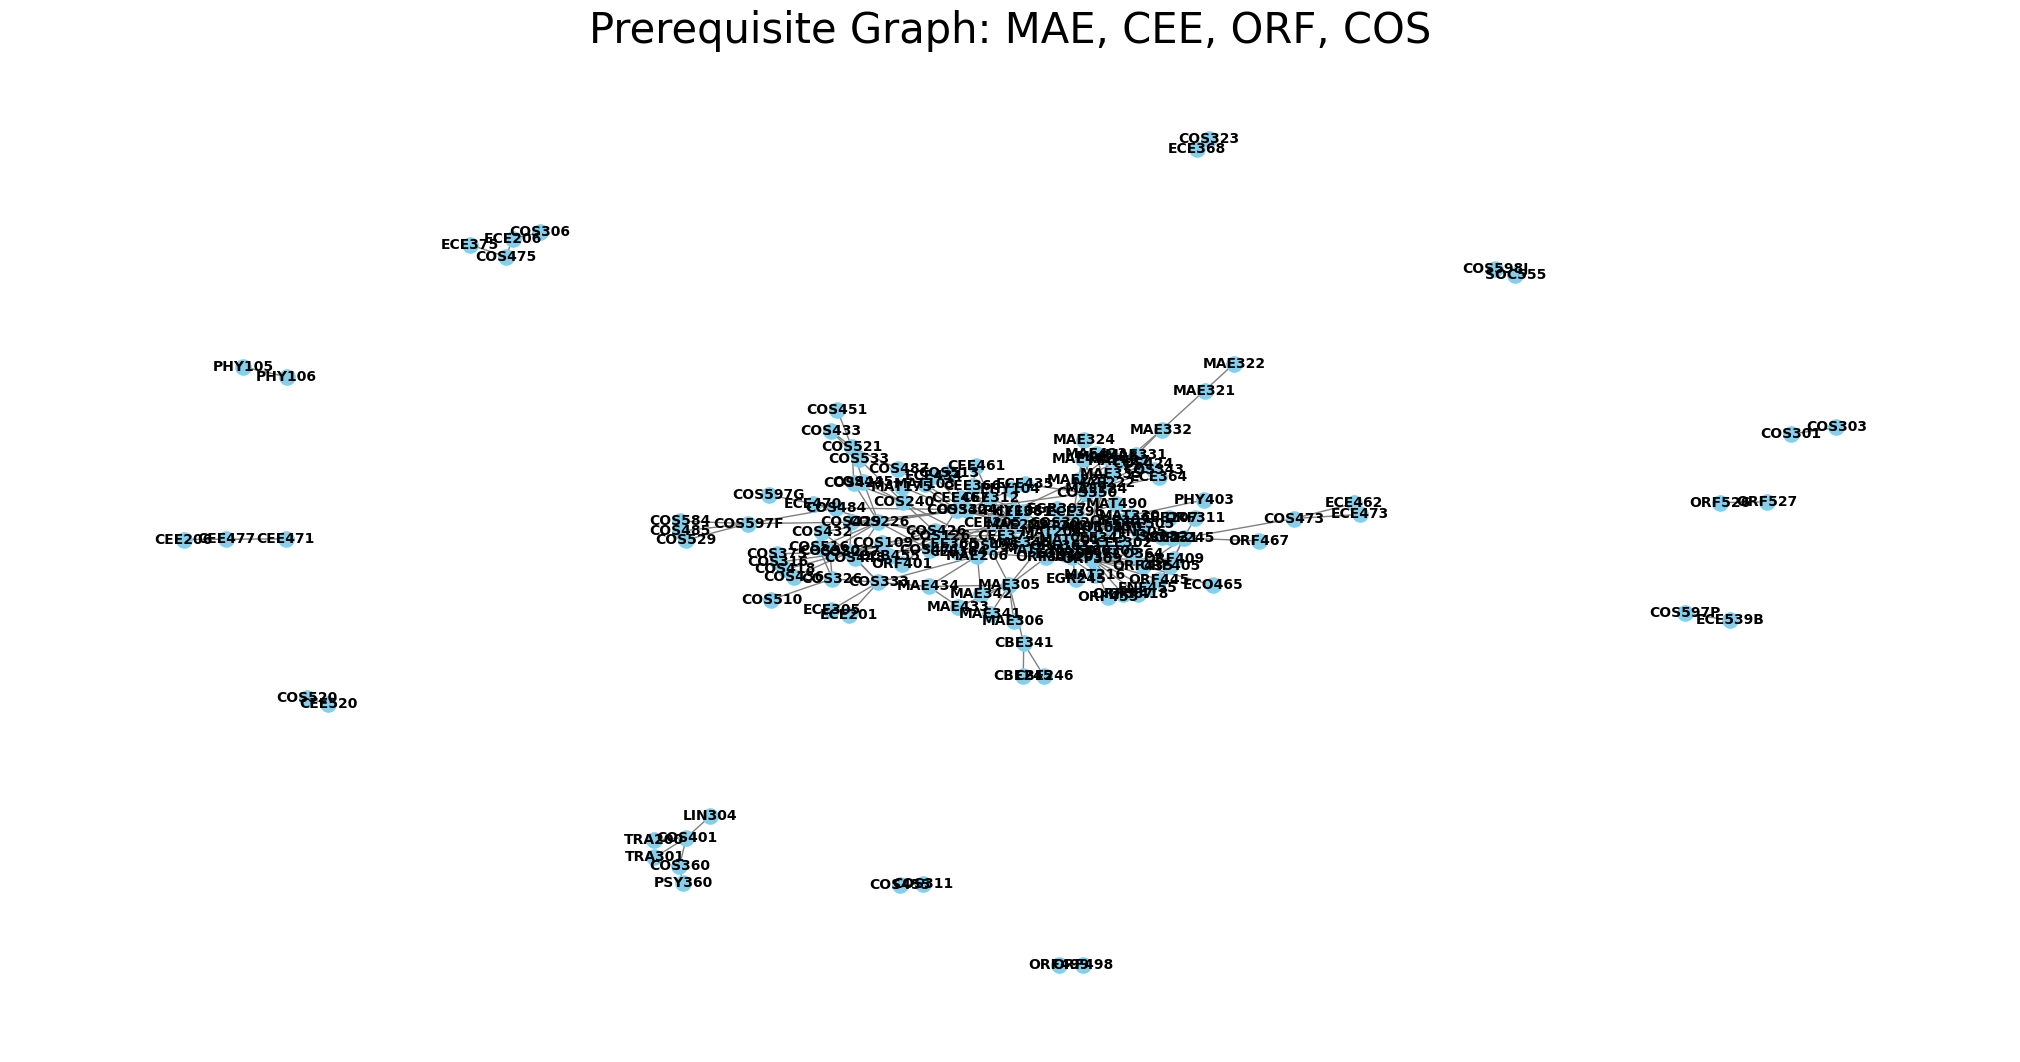

In [ ]:

plt.figure(figsize=(20,10))
# Create a directed graph
G = nx.Graph()

# Add edges
G.add_edges_from(orfClasses)
G.add_edges_from(cosClasses)
G.add_edges_from(maeClasses)
G.add_edges_from(ceeClasses)

# Draw the graph
nx.draw(G, with_labels=True, node_size=120, node_color="skyblue", font_size=10, font_weight="bold", font_color="black", edge_color="gray")
nx.circular_layout(G, scale =.100)
plt.title("Prerequisite Graph: MAE, CEE, ORF, COS", fontsize = 30)
plt.show()

centralityTotal = nx.betweenness_centrality(G)


We compute the betweenness centrality of the network to find that MAT202 has the highest betweenness centrality, which may arise because it is a strong prerequisite for the class.

Node with maximum centrality: MAT202
Centrality value: 0.21916258332689953


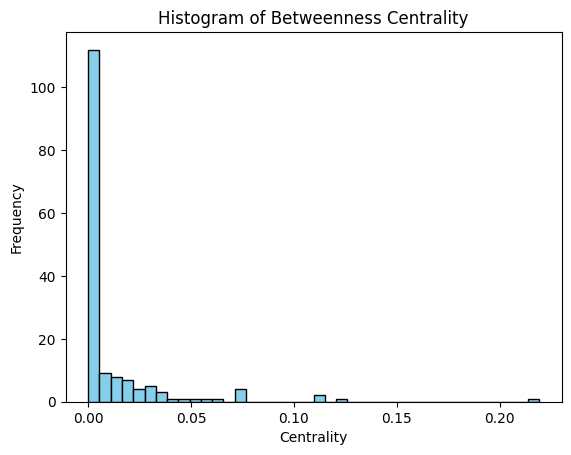

In [ ]:
centrality = centralityTotal
max_centrality_node = max(centrality, key=centrality.get)
print("Node with maximum centrality:", max_centrality_node)
print("Centrality value:", centrality[max_centrality_node])


plt.hist(list(centrality.values()), bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.show()

#3. ORF Department

Here, we can now study the network of classes listed by the ORF department.

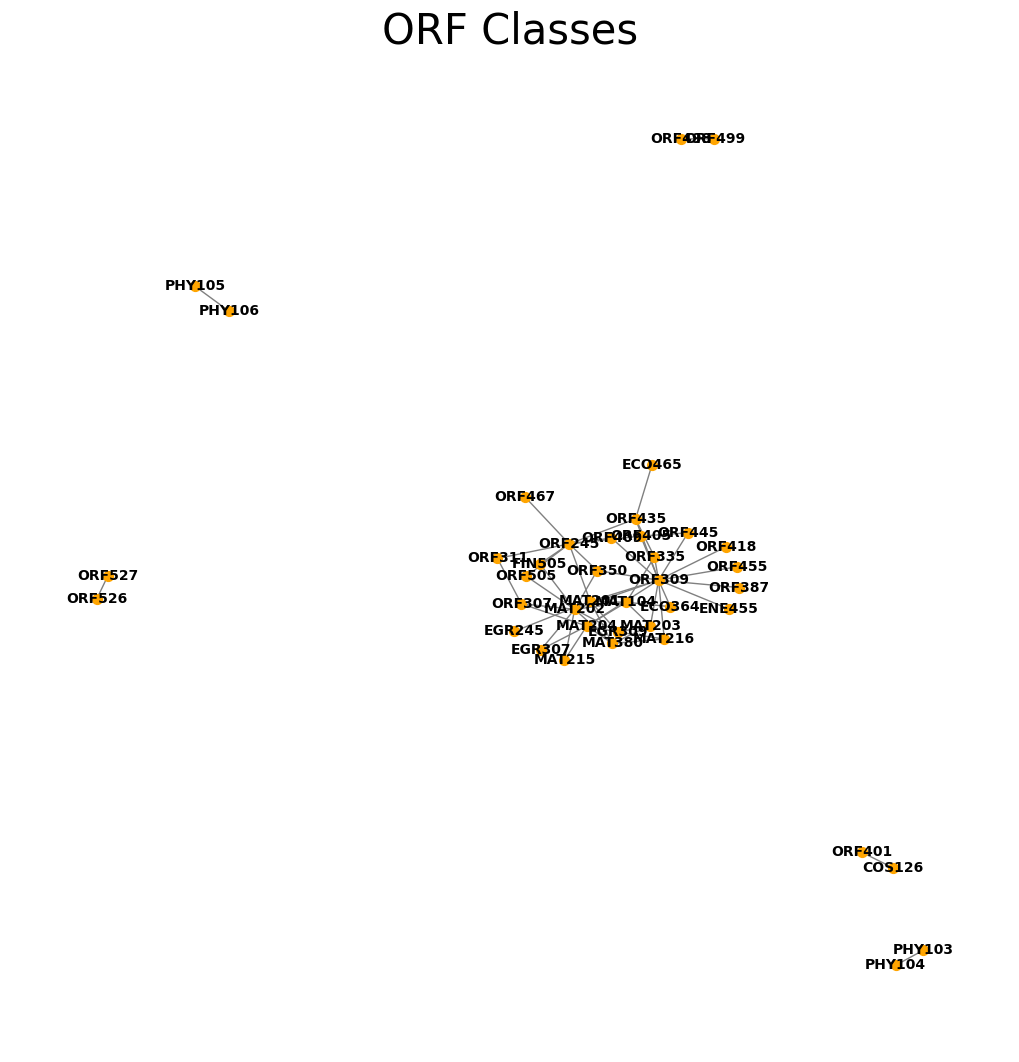

In [ ]:
plt.figure(figsize=(10,10))
# Create a directed graph
G = nx.Graph()

# Add edges
G.add_edges_from(orfClasses)


# Draw the graph
nx.draw(G, with_labels=True, node_size=50, font_size=10, font_weight="bold", node_color="orange", edge_color="gray")
nx.circular_layout(G)
plt.title("ORF Classes", size = 30)
plt.show()


centralityORF = nx.betweenness_centrality(G)

By betweenness centrality, we see that ORF309 has the highest weight.

Node with maximum centrality: ORF309
Centrality value: 0.2846879073093647


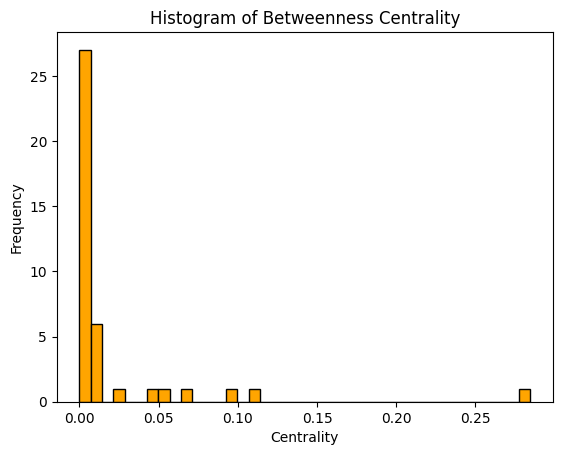

In [ ]:
centrality = centralityORF
max_centrality_node = max(centrality, key=centrality.get)
print("Node with maximum centrality:", max_centrality_node)
print("Centrality value:", centrality[max_centrality_node])


plt.hist(list(centrality.values()), bins=40, color='orange', edgecolor='black')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.show()

#4. MAE Department

Here, we can now study the network of classes listed by the MAE department.

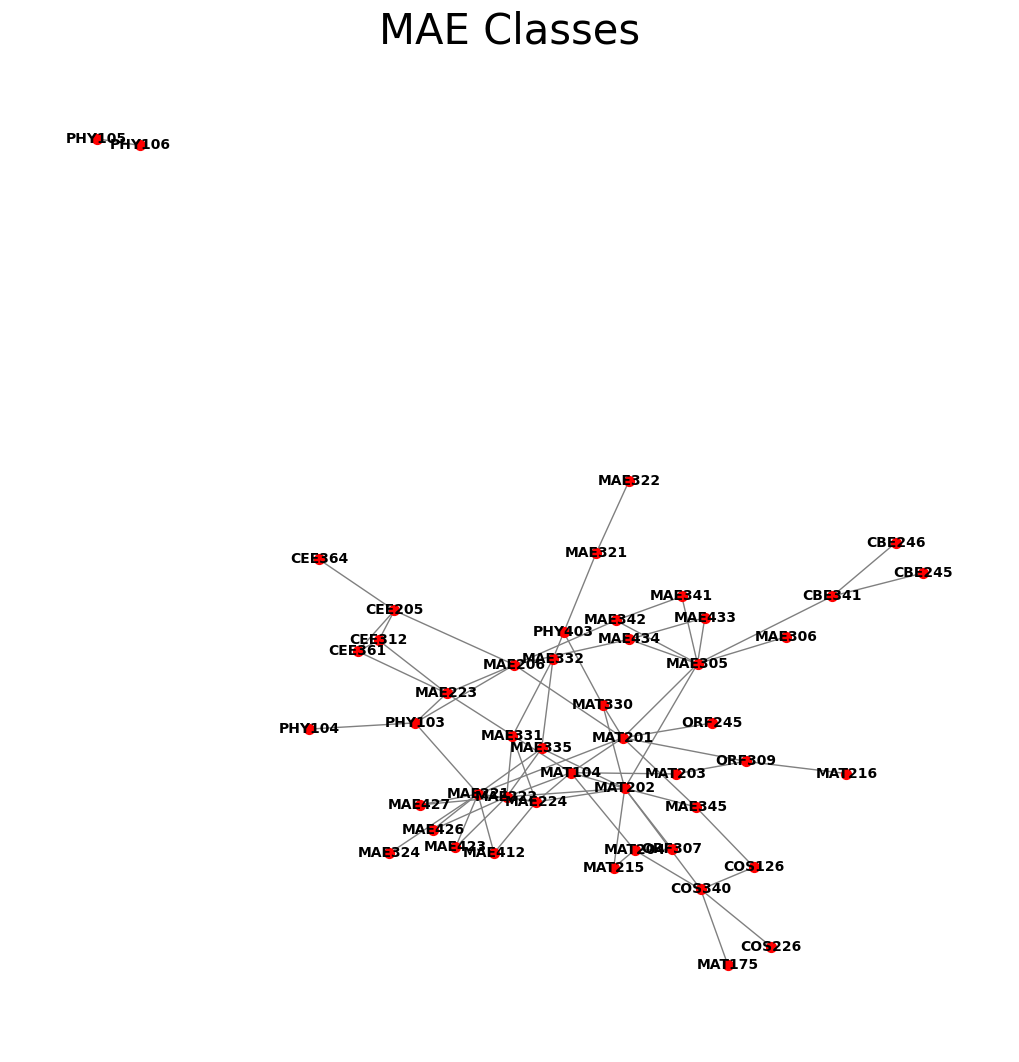

In [ ]:
plt.figure(figsize=(10,10))
# Create a directed graph
G = nx.Graph()

# Add edges
G.add_edges_from(maeClasses)

# Draw the graph
nx.draw(G, with_labels=True, node_size=50, node_color="red", font_size=10, font_weight="bold", font_color="black", edge_color="gray")
nx.circular_layout(G)
plt.title("MAE Classes", size = 30)
plt.show()

centralityMAE = nx.betweenness_centrality(G)

By betweenness centrality, we see that MAT202 has the highest betweenness. However, the second highest betweenness is MAE 305.

Node with maximum centrality: MAT202
Centrality value: 0.30286307467158524


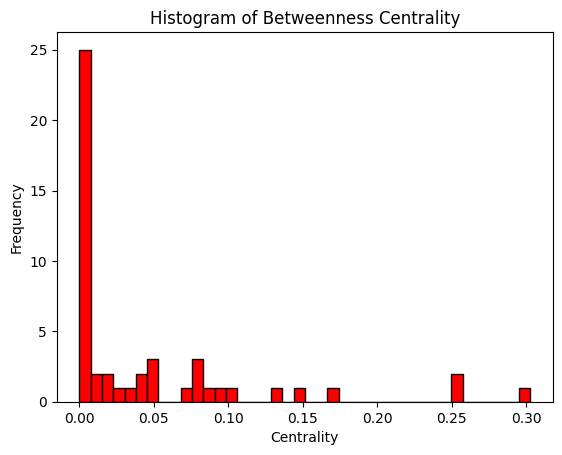

0.25501243732626716


In [ ]:
centrality = centralityMAE
max_centrality_node = max(centrality, key=centrality.get)
print("Node with maximum centrality:", max_centrality_node)
print("Centrality value:", centrality[max_centrality_node])


plt.hist(list(centrality.values()), bins=40, color='red', edgecolor='black')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.show()

print(centrality.get("MAE305"))

#5. COS Department

Here, we can now study the network of classes listed by the COS department.

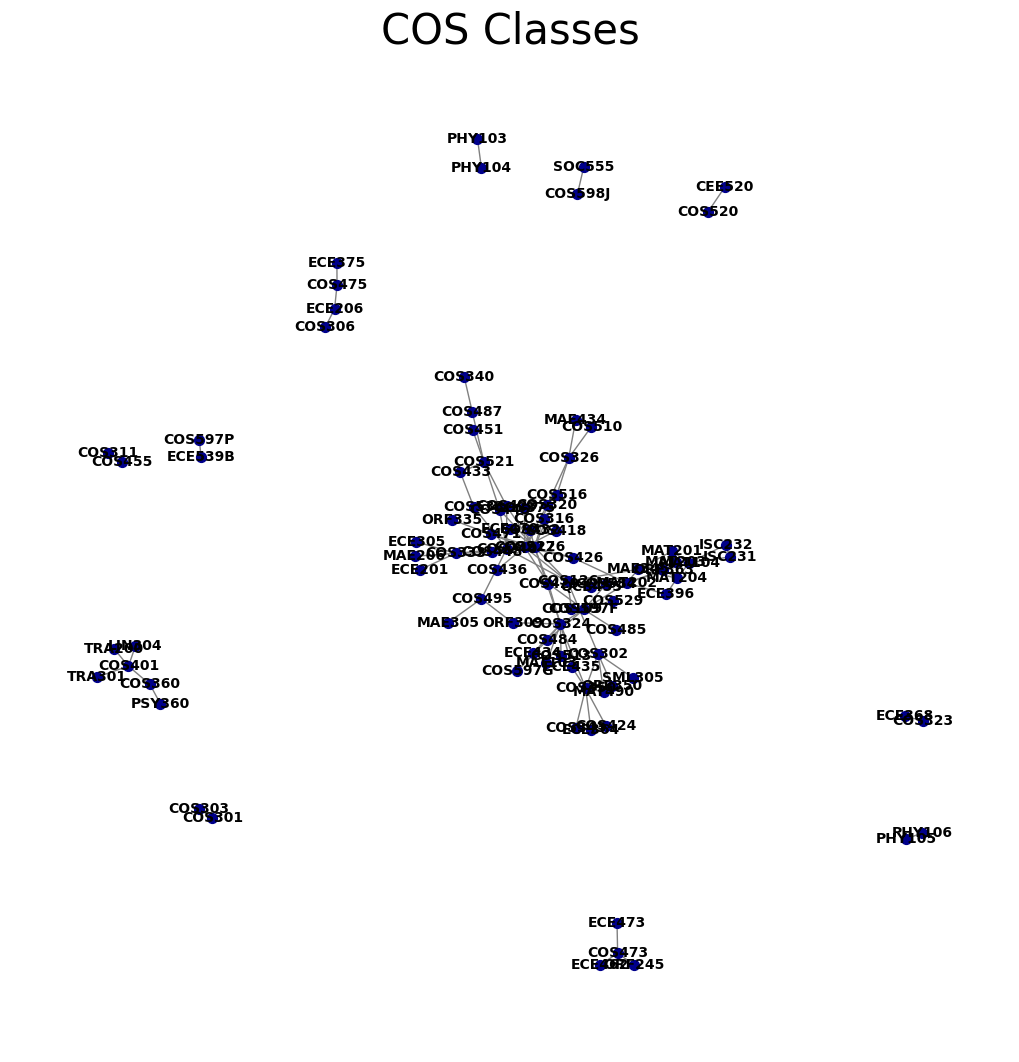

In [ ]:
plt.figure(figsize=(10,10))
# Create a directed graph
G = nx.Graph()

# Add edges
G.add_edges_from(cosClasses)

# Draw the graph
nx.draw(G, with_labels=True, node_size=50, node_color="darkblue", font_size=10, font_weight="bold", font_color="black", edge_color="gray")
nx.circular_layout(G)
plt.title("COS Classes", size = 30)
plt.show()

centralityCOS = nx.betweenness_centrality(G)


Based on the betweenness centrality scores, we see that COS226 is the highest course in terms of centrality.

Node with maximum centrality: COS226
Centrality value: 0.170683357329494


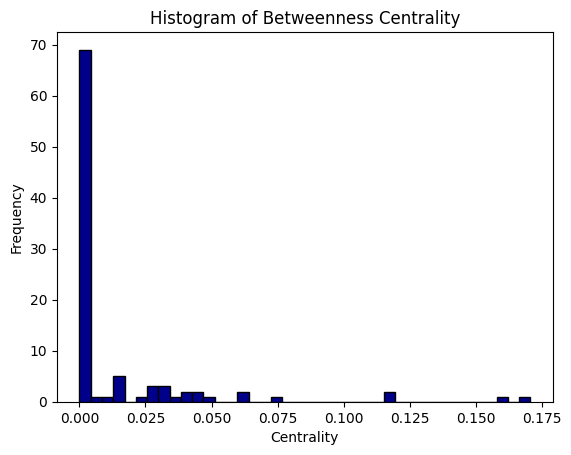

In [ ]:
centrality = centralityCOS
max_centrality_node = max(centrality, key=centrality.get)
print("Node with maximum centrality:", max_centrality_node)
print("Centrality value:", centrality[max_centrality_node])


plt.hist(list(centrality.values()), bins=40, color='darkblue', edgecolor='black')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.show()




#6. CEE Department

Here, we can now study the network of classes listed by the COS department.

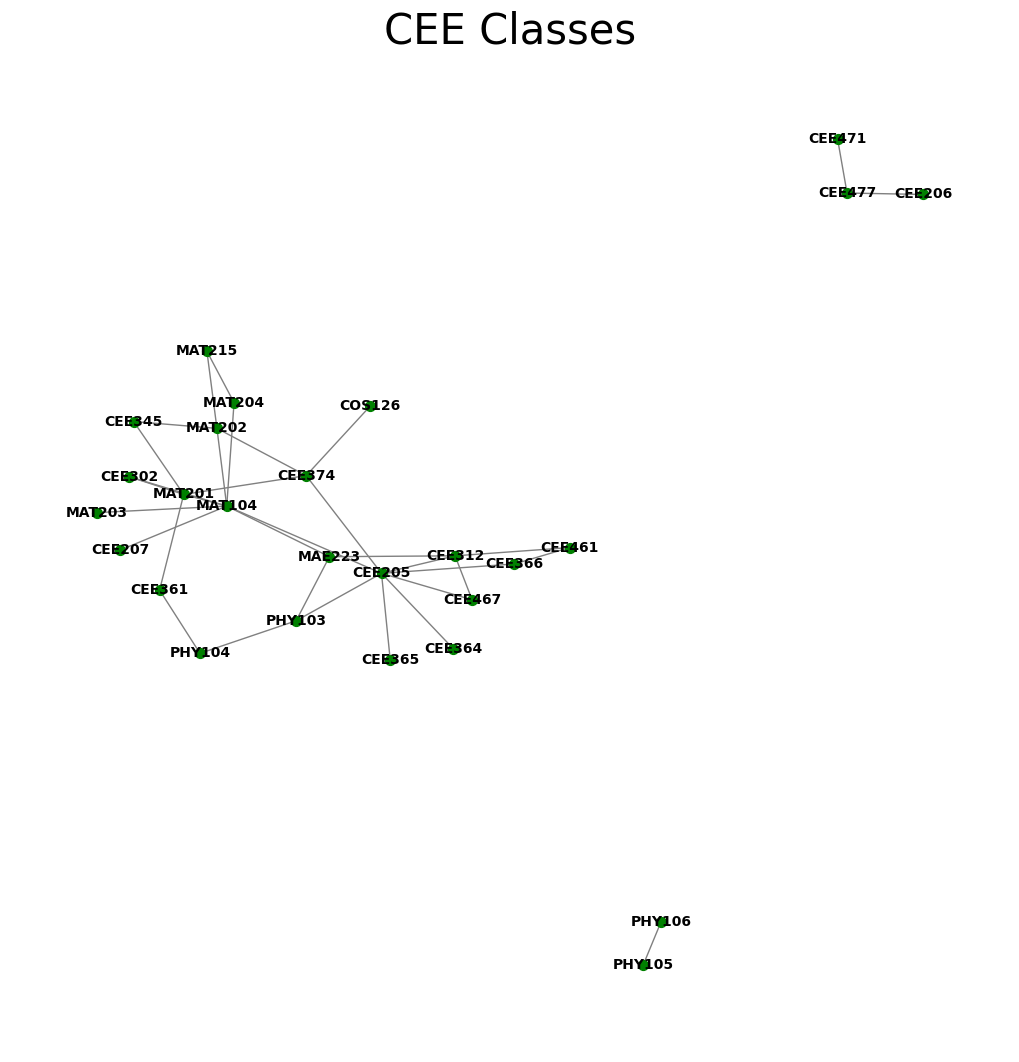

In [ ]:
plt.figure(figsize=(10,10))
# Create a directed graph
G = nx.Graph()

# Add edges
G.add_edges_from(ceeClasses)

# Draw the graph
nx.draw(G, with_labels=True, node_size=50, node_color="green", font_size=10, font_weight="bold", font_color="black", edge_color="gray")
nx.circular_layout(G)
plt.title("CEE Classes", size = 30)
plt.show()

centralityCEE = nx.betweenness_centrality(G)


Based on the betweenness centrality scores, we see that CEE205 is the highest course in terms of centrality.

Node with maximum centrality: CEE205
Centrality value: 0.314014652014652


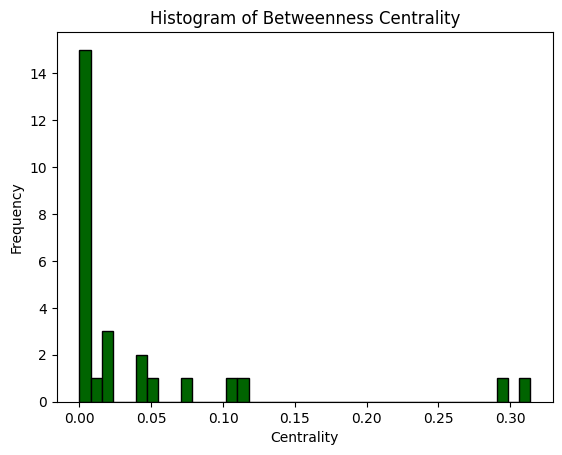

In [ ]:
centrality = centralityCEE
max_centrality_node = max(centrality, key=centrality.get)
print("Node with maximum centrality:", max_centrality_node)
print("Centrality value:", centrality[max_centrality_node])


plt.hist(list(centrality.values()), bins=40, color='darkgreen', edgecolor='black')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.show()